# Electricity Consumption Prediction (ECP)

## Prediction for a single user

In this notebook we're going to predict electricity consumption for a single user

In [2]:
# Import required packages

import glob
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## 1.1. Peek at Our Data

There is no substitute for looking at the raw data.

Looking at the raw data can reveal insights that you cannot get any other way. It can also plant seeds that may later grow into ideas on how to better preprocess and handle the data for machine learning tasks.

We can review the first 5 rows of our data here.

In [3]:
# # Spliting data for unique users

# # Load the cleaned dataset
# # df = pd.read_csv("../dataset/dbBills_cleaned.csv")
# df = pd.read_csv("../dataset/dbBills_normalized.csv")

# unique_users = df['xSubscriptionId_fk'].unique()

# for unique_user in unique_users:
#     temp_df = df
#     user_data = temp_df.loc[temp_df['xSubscriptionId_fk'] == unique_user]
    
#     user_data.to_csv('../dataset/users_data/' + str(unique_user) + '.csv')

In [4]:
# Load the dataset
df = pd.read_csv("../dataset/users_data/8750947.csv")

# Print top 5 reeocrds of dataset
df.head()

,Unnamed: 0,Unnamed: 0.1,xSubscriptionId_fk,xCycleCode,xFamilyNum,xFaze,xAmper,xCounterBuldingNo,xRegionName_Roustaei,xRegionName_Shahri,xUsageGroupName_Keshavarzi,xUsageGroupName_Khanegi,xUsageGroupName_Omoomi,xUsageGroupName_Sanati,xUsageGroupName_Sayer,xBakhshCode_1,xBakhshCode_2,xBakhshCode_4,xTimeControlCode_1,xTimeControlCode_2,xTimeControlCode_3,xTariffOldCode_1010,xTariffOldCode_1011,xTariffOldCode_1110,xTariffOldCode_1111,xTariffOldCode_1990,xTariffOldCode_2110,xTariffOldCode_2210,xTariffOldCode_2310,xTariffOldCode_2410,xTariffOldCode_2510,xTariffOldCode_2610,xTariffOldCode_2710,xTariffOldCode_2990,xTariffOldCode_2992,xTariffOldCode_3110,xTariffOldCode_3210,xTariffOldCode_3310,xTariffOldCode_3410,xTariffOldCode_3520,xTariffOldCode_3540,xTariffOldCode_3740,xTariffOldCode_3991,xTariffOldCode_4410,xTariffOldCode_4610,xTariffOldCode_4990,xTariffOldCode_5110,xTariffOldCode_5990,days_difference,month,mediumDailyUsage,highDailyUsage,lowDailyUsage,xMeduimKw,xHighKw,xLowKw
0,1724282,1724282,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,1,9.632653,0.0,0.0,472,0,0
1,1724283,1724283,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,9,9.215686,0.0,0.0,470,0,0
2,1724284,1724284,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,5,10.800000,0.0,0.0,702,0,0
3,1724285,1724285,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,7,9.016667,0.0,0.0,541,0,0
4,1724286,1724286,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,9,8.803571,0.0,0.0,493,0,0


We can see that the first column lists the row number, which is handy for referencing a specific observation.

## 1.2. Dimensions of Our Data

We must have a very good handle on how much data we have, both in terms of rows and columns.

Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.
You can review the shape and size of your dataset by printing the shape property.

In [5]:
# Dimensions of your data
print("Our data has dimention of {} Records and {} Columns or Features.".format(df.shape[0], df.shape[1]))

Our data has dimention of 65 Records and 56 Columns or Features.


## 1.3. Data Type For Each Attribute

The type of each attribute is important.

Strings may need to be converted to floating point values or integers to represent categorical or ordinal values.

We can get an idea of the types of attributes by peeking at the raw data, as above. We can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.

In [6]:
# Data Types for Each Attribute
types = df.dtypes
types.head(56)

Unnamed: 0                      int64
Unnamed: 0.1                    int64
xSubscriptionId_fk              int64
xCycleCode                      int64
xFamilyNum                      int64
xFaze                           int64
xAmper                          int64
xCounterBuldingNo               int64
xRegionName_Roustaei            int64
xRegionName_Shahri              int64
xUsageGroupName_Keshavarzi      int64
xUsageGroupName_Khanegi         int64
xUsageGroupName_Omoomi          int64
xUsageGroupName_Sanati          int64
xUsageGroupName_Sayer           int64
xBakhshCode_1                   int64
xBakhshCode_2                   int64
xBakhshCode_4                   int64
xTimeControlCode_1              int64
xTimeControlCode_2              int64
xTimeControlCode_3              int64
xTariffOldCode_1010             int64
xTariffOldCode_1011             int64
xTariffOldCode_1110             int64
xTariffOldCode_1111             int64
xTariffOldCode_1990             int64
xTariffOldCo

We can see that most of the attribute types are objects (categorical string values).

## 1.4. Data Cleaning and Transformation

For apply more effective analysis on data we need to reshape our data. So we transform categorical data to numbers using one-hot encoding and fill **NaN** valuses with average amount as a way for data cleaning.

In [7]:
# Clean Dataset

df = df.drop(df.columns[[0, 1]], 1)

# Print top 5 reeocrds of dataset
df.head(62)

,xSubscriptionId_fk,xCycleCode,xFamilyNum,xFaze,xAmper,xCounterBuldingNo,xRegionName_Roustaei,xRegionName_Shahri,xUsageGroupName_Keshavarzi,xUsageGroupName_Khanegi,xUsageGroupName_Omoomi,xUsageGroupName_Sanati,xUsageGroupName_Sayer,xBakhshCode_1,xBakhshCode_2,xBakhshCode_4,xTimeControlCode_1,xTimeControlCode_2,xTimeControlCode_3,xTariffOldCode_1010,xTariffOldCode_1011,xTariffOldCode_1110,xTariffOldCode_1111,xTariffOldCode_1990,xTariffOldCode_2110,xTariffOldCode_2210,xTariffOldCode_2310,xTariffOldCode_2410,xTariffOldCode_2510,xTariffOldCode_2610,xTariffOldCode_2710,xTariffOldCode_2990,xTariffOldCode_2992,xTariffOldCode_3110,xTariffOldCode_3210,xTariffOldCode_3310,xTariffOldCode_3410,xTariffOldCode_3520,xTariffOldCode_3540,xTariffOldCode_3740,xTariffOldCode_3991,xTariffOldCode_4410,xTariffOldCode_4610,xTariffOldCode_4990,xTariffOldCode_5110,xTariffOldCode_5990,days_difference,month,mediumDailyUsage,highDailyUsage,lowDailyUsage,xMeduimKw,xHighKw,xLowKw
0,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,1,9.632653,0.0,0.0,472,0,0
1,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,9,9.215686,0.0,0.0,470,0,0
2,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,5,10.800000,0.0,0.0,702,0,0
3,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,7,9.016667,0.0,0.0,541,0,0
4,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,9,8.803571,0.0,0.0,493,0,0
5,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,5,10.370968,0.0,0.0,643,0,0
6,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,5,11.909091,0.0,0.0,655,0,0
7,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,11,9.216216,0.0,0.0,682,0,0
8,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69,3,13.275362,0.0,0.0,916,0,0
9,8750947,16,1,1,25,82205144,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,5,11.910714,0.0,0.0,667,0,0


## 1.5. Descriptive Statistics

Descriptive statistics can give you great insight into the shape of each attribute.

Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute:

* **Count**
* **Mean**
* **Standard Devaition**
* **Minimum Value**
* **25th Percentile**
* **50th Percentile (Median)**
* **75th Percentile**
* **Maximum Value**

In [8]:
df.describe()

,xSubscriptionId_fk,xCycleCode,xFamilyNum,xFaze,xAmper,xCounterBuldingNo,xRegionName_Roustaei,xRegionName_Shahri,xUsageGroupName_Keshavarzi,xUsageGroupName_Khanegi,xUsageGroupName_Omoomi,xUsageGroupName_Sanati,xUsageGroupName_Sayer,xBakhshCode_1,xBakhshCode_2,xBakhshCode_4,xTimeControlCode_1,xTimeControlCode_2,xTimeControlCode_3,xTariffOldCode_1010,xTariffOldCode_1011,xTariffOldCode_1110,xTariffOldCode_1111,xTariffOldCode_1990,xTariffOldCode_2110,xTariffOldCode_2210,xTariffOldCode_2310,xTariffOldCode_2410,xTariffOldCode_2510,xTariffOldCode_2610,xTariffOldCode_2710,xTariffOldCode_2990,xTariffOldCode_2992,xTariffOldCode_3110,xTariffOldCode_3210,xTariffOldCode_3310,xTariffOldCode_3410,xTariffOldCode_3520,xTariffOldCode_3540,xTariffOldCode_3740,xTariffOldCode_3991,xTariffOldCode_4410,xTariffOldCode_4610,xTariffOldCode_4990,xTariffOldCode_5110,xTariffOldCode_5990,days_difference,month,mediumDailyUsage,highDailyUsage,lowDailyUsage,xMeduimKw,xHighKw,xLowKw
count,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.000000,65.000000,65.000000,65.0,65.0,65.000000,65.0,65.0
mean,8750947.0,16.0,1.0,1.0,25.0,82205144.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.600000,6.000000,10.159946,0.0,0.0,615.138462,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.731429,3.418699,1.718571,0.0,0.0,123.699595,0.0,0.0
min,8750947.0,16.0,1.0,1.0,25.0,82205144.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.000000,1.000000,6.881356,0.0,0.0,406.000000,0.0,0.0
25%,8750947.0,16.0,1.0,1.0,25.0,82205144.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.000000,3.000000,9.016667,0.0,0.0,502.000000,0.0,0.0
50%,8750947.0,16.0,1.0,1.0,25.0,82205144.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,6.000000,9.653333,0.0,0.0,617.000000,0.0,0.0
75%,8750947.0,16.0,1.0,1.0,25.0,82205144.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.000000,9.000000,11.491803,0.0,0.0,702.000000,0.0,0.0
max,8750947.0,16.0,1.0,1.0,25.0,82205144.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.000000,12.000000,15.907407,0.0,0.0,916.000000,0.0,0.0


We can see that we do get a lot of data. We will note some functio calls in the recipe to change the precision of the numbers and the preferred width of the output. This is to make it more readable for this example.

When describing our data this way, it is worth taking some time and reviewing observations from the results. This might include the presence of “NA” values for missing data or surprising distributions for attributes. We can see Box-Plot chart for 4 selected features as following. This charts will help us to detect outliers.

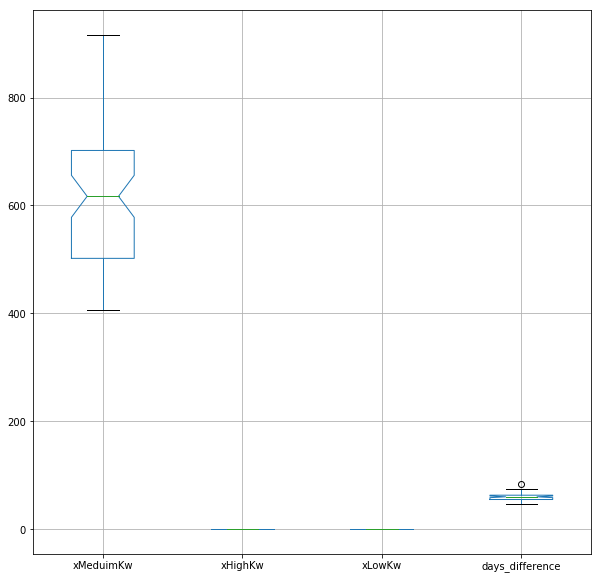

In [9]:
boxplot = df.boxplot(column=['xMeduimKw', 'xHighKw', 'xLowKw', 'days_difference'], 
                                   return_type='axes', 
                                   figsize=(10,10),
                                   notch = True
                                  )

### Interpreting the Box-Plot chart for weights

A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

# 1.6. Classification

In this section we're going to try some regression algorithms to predict 'xMeduimKw' value.

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

features = ['days_difference', 'month']

X = df[features]
y = df["mediumDailyUsage"]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.1, random_state = 0)

print(xTest)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(yTest)

    days_difference  month
45               57      8
29               57      3
43               52      1
62               61      3
34               56      6
33               63     10
31               54      8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
45     9.736842
29    12.947368
43     8.634615
62    11.590164
34    10.178571
33     9.396825
31     9.407407
Name: mediumDailyUsage, dtype: float64


## 1.6.1. SVR

In [11]:
from sklearn import svm

clf = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(xTrain, yTrain)

print(mean_squared_error(yTest, clf.predict(xTest)))

clf.predict(xTest)

0.42554297005768865


c:\users\pbarjoueian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([ 9.52653128, 11.79277547,  9.24628591, 11.02310807, 10.90000863,
        9.99732056,  9.25016235])

## 1.6.2. tree

In [12]:
from sklearn import tree
from sklearn.metrics import mean_squared_error

est = tree.DecisionTreeRegressor()
est.fit(xTrain, yTrain)  

print(mean_squared_error(yTest, est.predict(xTest)))

est.predict(xTest)

2.265563285263773


array([ 7.61016949, 13.9122807 ,  9.22115385, 11.67741935,  7.61016949,
        9.87301587,  7.61016949])

## 1.6.3. GradientBoostingRegressor

In [13]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=600, learning_rate=0.1,
                                max_depth=3, random_state=0, loss='ls').fit(xTrain, yTrain)

print(mean_squared_error(yTest, est.predict(xTest)))

est.predict(xTest)

0.6080220615798558


array([ 9.4088912 , 13.90632016,  9.22054537, 11.82481856,  8.67845404,
        9.84644632,  8.79248765])

## 1.6.4. Neural Network

In [15]:
#Variables
x=X
y=y
y=np.reshape(y, (-1,1))
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(x)
yscale=scaler.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                36        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [19]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=0, validation_split=0.1)

dict_keys(['val_mean_squared_error', 'loss', 'mean_squared_error', 'mean_absolute_error', 'val_mean_absolute_error', 'val_loss'])


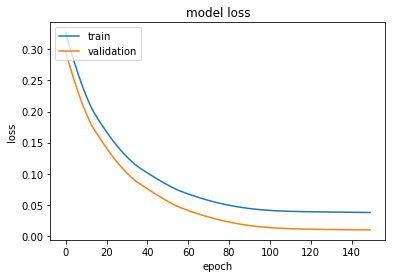

In [20]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
Xnew = np.array([[63, 10]])
ynew=model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[63 10], Predicted=[ 1.13495684]


# 2. Detect change in counter type and create model

In [14]:
def create_model(df, label, code):
    user_id = df['xSubscriptionId_fk'][0]
    features = ['days_difference', 'month']
    X = df[features]
    y = df[label]
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.1, random_state = 0)
    clf = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
        kernel='rbf', max_iter=-1, shrinking=True,
        tol=0.001, verbose=False)
    clf.fit(xTrain, yTrain)
    joblib.dump(clf, '../dataset/users_data/' + str(user_id) + '-' + label + '-' + str(code) + '.pkl')

In [15]:
def counter_create_model(df):    
    if df['xTimeControlCode_1'].all():
        if len(df.index) > 30:
            create_model(df, 'mediumDailyUsage', 100)
        else:
            create_model(df, 'mediumDailyUsage', 101)
    elif df['xTimeControlCode_2'].all() == 1:
        if len(df.index) > 30:
            create_model(df, 'mediumDailyUsage', 200)
            create_model(df, 'highDailyUsage', 210)
        else:
            create_model(df, 'mediumDailyUsage', 201)
            create_model(df, 'highDailyUsage', 211)
    elif df['xTimeControlCode_3'].all() == 1:
        if len(df.index) > 30:
            create_model(df, 'mediumDailyUsage', 300)
            create_model(df, 'highDailyUsage', 310)
            create_model(df, 'lowDailyUsage', 320)
        else:
            create_model(df, 'mediumDailyUsage', 301)
            create_model(df, 'highDailyUsage', 311)
            create_model(df, 'lowDailyUsage', 321)       

In [16]:
def counter_change_detection():
    user_unique_couters = df['xCounterBuldingNo'].unique()

    # We have only one type of counter
    if len(user_unique_couters) == 1:
        counter_create_model(df)

    # We have more than one type of counter
    elif len(user_unique_couters) >= 1:
        if df['xTimeControlCode_3'].any():
            new_user_data = df.loc[df['xTimeControlCode_3'] == 1]
            counter_create_model(new_user_data)
        elif df['xTimeControlCode_2'].any():
            new_user_data = df.loc[df['xTimeControlCode_2'] == 1]
            counter_create_model(new_user_data)

In [17]:
counter_change_detection()

c:\users\pbarjoueian\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 3. Load and test the model

In [33]:
base_path = '../dataset/users_data/'
user_id = 8750947
models = glob.glob(base_path + str(user_id) + '*.pkl')

code = models[0].split("-")[2].split(".")[0]
first_digit_code = (int(str(code)[:1]))
last_digit_code = (int(str(code)[1:]))

if first_digit_code == 1:
    if last_digit_code == 0:
        print("medium: ")
        est = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-100.pkl'.format(str(user_id)))
    else:
        print("medium not percise: ")
        est = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-101.pkl'.format(str(user_id)))
elif first_digit_code == 2:
    if last_digit_code == 0:
        print("medium: ")
        est_medium = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-200.pkl'.format(str(user_id)))
        print("high: ")
        est_high = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-210.pkl'.format(str(user_id)))
    else:
        print("medium not percise: ")
        est_medium = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-201.pkl'.format(str(user_id)))
        print("high not percise: ")
        est_high = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-211.pkl'.format(str(user_id)))
elif first_digit_code == 3:
    if last_digit_code == 0:
        print("medium: ")
        est_medium = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-300.pkl'.format(str(user_id)))
        print("high: ")
        est_high = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-310.pkl'.format(str(user_id)))
        print("low: ")
        est_low = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-320.pkl'.format(str(user_id)))
    else:
        print("medium not percise: ")
        est_medium = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-301.pkl'.format(str(user_id)))
        print("high not percise: ")
        est_high = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-311.pkl'.format(str(user_id)))
        print("low not percise: ")
        est_low = joblib.load('../dataset/users_data\{0}-mediumDailyUsage-321.pkl'.format(str(user_id)))

medium: 


In [29]:
est = joblib.load('../dataset/users_data\8750947-mediumDailyUsage-100.pkl')

In [30]:
predicted = est.predict([[56, 6]])
predicted = predicted[0]*56

expected = 10.178571 * 56

error = predicted - expected
error_percent = (error *100) / expected
error_percent

7.087808557804198

In [20]:
sample = df.sample(20)
input_data = sample[features]

expected = sample['mediumDailyUsage']

predicted = est.predict(input_data)

print(mean_squared_error(expected, est.predict(input_data)))

errors = ((expected - predicted) * 100) / expected
errors.mean

1.410894237481728


<bound method Series.mean of 27     9.785060
36     2.596478
24     0.983553
37    -0.182924
29     8.917588
49    -9.675470
6      0.839006
60    -1.022347
38    -6.575159
1     -1.086219
17     0.963284
0     -1.039943
30    28.061652
39    -2.925477
23    13.759674
40    -8.491302
64     0.621178
12    -1.113935
42    -1.126362
4     -0.837739
Name: mediumDailyUsage, dtype: float64>